# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
final_feature_df = pd.read_pickle('Final_Data/final_feature_df.pkl')
print(len(final_feature_df))
final_feature_df.head()


966046


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,speech_length,age,gender,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,546,57.0,männlich,0.0,NaN,NaN,NaN,Erfurt,former GDR,Large City
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,...,45,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,895,57.0,männlich,0.0,NaN,NaN,NaN,Erfurt,former GDR,Large City
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,...,24,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,49,57.0,männlich,0.0,NaN,NaN,NaN,Erfurt,former GDR,Large City


In [4]:
sentiments_df = pd.read_pickle('sentiment/content_df_features_sentiment.pkl')

#rename column sentiment_score_2 to net_sentiment_score
sentiments_df.rename(columns={'sentiment_score_2':'net_sentiment_score', 'sentiment_score_2_positivity':'positivity_sentiment', 'sentiment_score_2_negativity':'negativity_sentiment'}, inplace=True)



sentiments_df


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,faction,year,speech_length,age,gender,tenure,sentiment_score_1,net_sentiment_score,positivity_sentiment,negativity_sentiment
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,CDU/CSU,1949,546,57.0,männlich,0.000000,0.000000,0.047619,0.047619,0.000000
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,...,NaN,1949,45,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,CDU/CSU,1949,895,57.0,männlich,0.000000,0.133946,0.181818,0.212121,0.030303
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,...,NaN,1949,24,NaN,NaN,0.000000,0.000000,1.000000,1.000000,0.000000
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,CDU/CSU,1949,49,57.0,männlich,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966041,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,None,11004891,...,AfD,2024,1799,57.0,männlich,6.594521,0.112649,0.030534,0.099237,0.068702
966042,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,...,DIE LINKE.,2024,18,61.0,weiblich,25.887671,0.000000,0.000000,0.000000,0.000000
966043,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,None,11004891,...,Fraktionslos,2024,12,57.0,männlich,6.594521,0.000000,0.500000,0.500000,0.000000
966044,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,...,DIE LINKE.,2024,65,61.0,weiblich,25.887671,0.000000,0.000000,0.000000,0.000000


In [5]:
bert_results = pd.read_pickle('LLM_Results/final_results_BERT_id.pkl')
print(len(bert_results))
bert_results.head()

709864


,id_0,split_speeches,predicted_polarizing,id,id_new
0,1,"Herr Alterspräsident, ich schlage für die CDU/...",0,729471,17_1_729471_1
1,2,"Herr Präsident, ich nehme die Wahl gerne an.",0,729474,17_1_729474_1
2,3,"Herr Präsident, ich nehme die Wahl gerne an un...",0,729478,17_1_729478_1
3,4,"Ja, ich nehme die Wahl an.",0,729480,17_1_729480_1
4,5,Ich bedanke mich. Ich nehme die Wahl gerne an.,0,729482,17_1_729482_1


In [6]:
gpt_results_17 = pd.read_excel('LLM_Results/response_4o_mini_final_17.xlsx')
gpt_results_17.head()

,id,split_speeches,polarizing_4o_mini
0,17_1_729471_1,"Herr Alterspräsident, ich schlage für die CDU/...",0
1,17_1_729474_1,"Herr Präsident, ich nehme die Wahl gerne an.",0
2,17_1_729478_1,"Herr Präsident, ich nehme die Wahl gerne an un...",0
3,17_1_729480_1,"Ja, ich nehme die Wahl an.",0
4,17_1_729482_1,Ich bedanke mich. Ich nehme die Wahl gerne an.,0


In [7]:
gpt_results_18 = pd.read_excel('LLM_Results/response_4o_mini_final_18.xlsx')
gpt_results_18.head()

,id,split_speeches,polarizing_4o_mini
0,18_1_794027_1,"Herr Alterspräsident, ich schlage im Namen der...",0
1,18_1_794030_1,"Herr Alterspräsident, lieber Kollege Riesenhub...",0
2,18_1_794033_1,Sehr geehrter Herr Präsident! Liebe Kolleginne...,0
3,18_1_794033_2,"Ich erinnere an 1994, als den Grünen kein Stel...",0
4,18_1_794033_3,Das Bundestagspräsidium ist ein wichtiger Teil...,0


In [8]:
gpt_results_19 = pd.read_excel('LLM_Results/response_4o_mini_final_19.xlsx')
gpt_results_19.head()

,id,split_speeches,polarizing_4o_mini
0,19_1_1045489_1,Sehr geehrter Herr Präsident! Sehr geehrte Kol...,0
1,19_1_1045489_2,"Nur dann, wenn sich die Bürgerinnen und Bürger...",0
2,19_1_1045489_3,"Ihr Politikstil, Frau Merkel, ist ein Grund da...",1
3,19_1_1045489_4,"Er braucht keine Regierung, um zu arbeiten – i...",0
4,19_1_1045489_5,Doch wir wollen heute nach vorne schauen. Desh...,0


In [9]:
gpt_results_20 = pd.read_excel('LLM_Results/response_4o_mini_final_20.xlsx')
gpt_results_20.head()

,id,split_speeches,polarizing_4o_mini
0,20_1_1066957_1,Sehr geehrter Herr Alterspräsident! So muss ic...,0
1,20_1_1066959_1,Nicht lange; da haben Sie schon recht. – Liebe...,0
2,20_1_1066959_2,Sie ist nicht in Stein gemeißelt – das wissen ...,0
3,20_1_1066959_3,Wir begrüßen auch ausdrücklich die Initiative ...,0
4,20_1_1066959_4,"Wir plädieren allerdings auch dafür, dass wir ...",0


In [10]:
gpt_results = pd.concat([gpt_results_17, gpt_results_18, gpt_results_19, gpt_results_20])
print(len(gpt_results))
gpt_results.head()

710120


,id,split_speeches,polarizing_4o_mini
0,17_1_729471_1,"Herr Alterspräsident, ich schlage für die CDU/...",0
1,17_1_729474_1,"Herr Präsident, ich nehme die Wahl gerne an.",0
2,17_1_729478_1,"Herr Präsident, ich nehme die Wahl gerne an un...",0
3,17_1_729480_1,"Ja, ich nehme die Wahl an.",0
4,17_1_729482_1,Ich bedanke mich. Ich nehme die Wahl gerne an.,0


In [11]:
llama_results_20 = pd.read_csv('LLM_Results/WP20_LLAMA.csv')
llama_results_20

,Unnamed: 0,id,LLAMA
0,0,20_1_1066957_1,0
1,1,20_1_1066959_1,0
2,2,20_1_1066959_2,0
3,3,20_1_1066959_3,0
4,4,20_1_1066959_4,0
...,...,...,...
150642,150642,20_187_1075926_1,1
150643,150643,20_187_1075926_2,0
150644,150644,20_187_1075926_3,0
150645,150645,20_187_1075926_4,0


In [12]:
llama_results_19 = pd.read_csv('LLM_Results/WP19_LLAMA.csv')
llama_results_19

,Unnamed: 0,id,LLAMA
0,0,19_1_1045489_1,0
1,1,19_1_1045489_2,0
2,2,19_1_1045489_3,1
3,3,19_1_1045489_4,0
4,4,19_1_1045489_5,0
...,...,...,...
183113,183113,19_239_1013334_2,0
183114,183114,19_239_1013334_3,0
183115,183115,19_239_1013334_4,1
183116,183116,19_239_1013334_5,0


In [13]:
llama_results_18 = pd.read_csv('LLM_Results/WP18_LLAMA.csv')
llama_results_18

,Unnamed: 0,id,LLAMA
0,0,18_1_794027_1,0
1,1,18_1_794030_1,0
2,2,18_1_794033_1,0
3,3,18_1_794033_2,0
4,4,18_1_794033_3,0
...,...,...,...
163072,163072,18_245_846683_2,0
163073,163073,18_245_846683_3,0
163074,163074,18_245_846683_4,0
163075,163075,18_245_846683_5,0


In [14]:
llama_results_17 = pd.read_csv('LLM_Results/WP17_LLAMA.csv')
llama_results_17

,Unnamed: 0,id,LLAMA
0,0,17_1_729471_1,0
1,1,17_1_729474_1,0
2,2,17_1_729478_1,0
3,3,17_1_729480_1,0
4,4,17_1_729482_1,0
...,...,...,...
213017,213017,17_253_794024_14,0
213018,213018,17_253_794024_15,1
213019,213019,17_253_794024_16,0
213020,213020,17_253_794024_17,1


In [15]:
llama_results = pd.concat([llama_results_17, llama_results_18, llama_results_19, llama_results_20])
print(len(llama_results))
llama_results

709864


,Unnamed: 0,id,LLAMA
0,0,17_1_729471_1,0
1,1,17_1_729474_1,0
2,2,17_1_729478_1,0
3,3,17_1_729480_1,0
4,4,17_1_729482_1,0
...,...,...,...
150642,150642,20_187_1075926_1,1
150643,150643,20_187_1075926_2,0
150644,150644,20_187_1075926_3,0
150645,150645,20_187_1075926_4,0


# 2. Calculation of Polarization Scores

In [16]:
# show all duplicates of id for gpt results
duplicates_gpt = gpt_results[gpt_results['id'].duplicated(keep=False)].sort_values('id')
duplicates_gpt

gpt_results = gpt_results.drop_duplicates(subset='id', keep='first')
# rename polarizing_4o_mini
gpt_results = gpt_results.rename(columns={'polarizing_4o_mini': 'gpt'})
len(gpt_results)

709864

In [17]:
# rename column in bert_re
bert_results = bert_results.rename(columns={'predicted_polarizing': 'bert'})
llama_results = llama_results.rename(columns={'LLAMA': 'llama'})

In [18]:
# merge bert_results and gpt_results on id_new
bert_results['id'] = bert_results['id_new'].astype(str)
gpt_results['id'] = gpt_results['id'].astype(str)
llama_results_20['id'] = llama_results_20['id'].astype(str)

all_scores = pd.merge(bert_results, gpt_results[['gpt','id']], on='id', how='outer')
all_scores = pd.merge(all_scores, llama_results[['llama', 'id']], on='id', how='outer')

# drop column id_new
all_scores = all_scores.drop(columns=['id_new'])

all_scores.head()

,id_0,split_speeches,bert,id,gpt,llama
0,1,"Herr Alterspräsident, ich schlage für die CDU/...",0,17_1_729471_1,0,0
1,2,"Herr Präsident, ich nehme die Wahl gerne an.",0,17_1_729474_1,0,0
2,3,"Herr Präsident, ich nehme die Wahl gerne an un...",0,17_1_729478_1,0,0
3,4,"Ja, ich nehme die Wahl an.",0,17_1_729480_1,0,0
4,5,Ich bedanke mich. Ich nehme die Wahl gerne an.,0,17_1_729482_1,0,0


In [19]:
#split column id into electoral term, session, speech_id and speach_id_number
all_scores[['electoral_term', 'session', 'speech_id', 'speech_id_number']] = all_scores['id'].str.split('_', expand=True)

# sort columns
all_scores = all_scores[['electoral_term', 'session', 'speech_id', 'speech_id_number', 'id', 'bert', 'gpt', 'llama']]

all_scores['added_scores'] = all_scores['bert'] + all_scores['gpt'] + all_scores['llama']
# create a column polarizing if added_scores larger than 1
all_scores['polarizing_amount'] = np.where(all_scores['added_scores'] > 1, 1, 0)

all_scores

,electoral_term,session,speech_id,speech_id_number,id,bert,gpt,llama,added_scores,polarizing_amount
0,17,1,729471,1,17_1_729471_1,0,0,0,0,0
1,17,1,729474,1,17_1_729474_1,0,0,0,0,0
2,17,1,729478,1,17_1_729478_1,0,0,0,0,0
3,17,1,729480,1,17_1_729480_1,0,0,0,0,0
4,17,1,729482,1,17_1_729482_1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
709859,19,169,1062386,3,19_169_1062386_3,0,0,0,0,0
709860,19,169,1062388,1,19_169_1062388_1,0,0,0,0,0
709861,19,169,1062389,1,19_169_1062389_1,0,0,0,0,0
709862,19,169,1062389,2,19_169_1062389_2,0,0,0,0,0


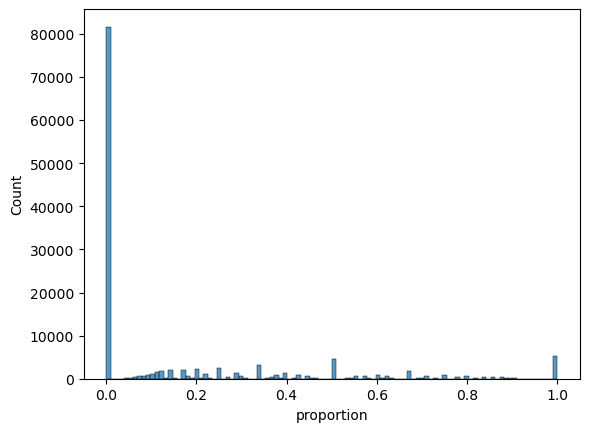

In [20]:
# group by speech_id, count polarizing speeches
scores_grouped = all_scores.groupby(["electoral_term", "speech_id"]).agg({"polarizing_amount":"sum", "id":"count"}).reset_index()
scores_grouped['proportion'] = scores_grouped['polarizing_amount']/scores_grouped['id']

# convert speech_id into int
scores_grouped['speech_id'] = scores_grouped['speech_id'].astype(int)
scores_grouped

# show distibution of polarizing speeches
sns.histplot(scores_grouped['proportion'])
plt.show()

In [30]:
scores_grouped['polarizing']=scores_grouped['proportion']>0.5

print(len(scores_grouped))
scores_grouped

131058


,electoral_term,speech_id,polarizing_amount,id,proportion,polarizing
0,17,729471,0,1,0.000000,False
1,17,729474,0,1,0.000000,False
2,17,729478,0,1,0.000000,False
3,17,729480,0,1,0.000000,False
4,17,729482,0,1,0.000000,False
...,...,...,...,...,...,...
131053,20,1120309,0,1,0.000000,False
131054,20,1120311,0,1,0.000000,False
131055,20,1120313,0,7,0.000000,False
131056,20,1120315,1,7,0.142857,False


In [38]:
# change 'polarizing score for id 1092152 to 0
scores_grouped.loc[scores_grouped['speech_id'] == 1092152, 'polarizing'] = False

In [39]:
# calculate percentage of polarizing speeches
polarizing_percentage = scores_grouped.groupby('electoral_term')['polarizing'].mean()
polarizing_percentage

electoral_term
17    0.085104
18    0.059471
19    0.147872
20    0.179301
Name: polarizing, dtype: float64

In [40]:
# contn amoint of polarizing speeches for all_scores dataframe for gpt bert and llama for electoral term 18
all_scores_18 = all_scores[all_scores['electoral_term']=='18']
print(len(all_scores_18))

# sum polarizing speeches for bert, gpt and llama
bert_scores_18 = all_scores_18['bert'].sum()
gpt_scores_18 = all_scores_18['gpt'].sum()
llama_scores_18 = all_scores_18['llama'].sum()

print(bert_scores_18, gpt_scores_18, llama_scores_18)

all_scores_19 = all_scores[all_scores['electoral_term']=='19']
print(len(all_scores_19))

bert_scores_19 = all_scores_19['bert'].sum()
gpt_scores_19 = all_scores_19['gpt'].sum()
llama_scores_19 = all_scores_19['llama'].sum()

print(bert_scores_19, gpt_scores_19, llama_scores_19)

163077
18640 24880 27652
183118
37814 47466 43382


# 3. Merge with feature df

In [41]:
final_feature_df_sent = pd.merge(final_feature_df, sentiments_df[['id', 'net_sentiment_score', 'positivity_sentiment', 'negativity_sentiment']], on='id', how='left')   
final_feature_df_sent

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification,net_sentiment_score,positivity_sentiment,negativity_sentiment
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,0.000000,NaN,NaN,NaN,Erfurt,former GDR,Large City,0.047619,0.047619,0.000000
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,0.000000,NaN,NaN,NaN,Erfurt,former GDR,Large City,0.181818,0.212121,0.030303
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,0.000000,NaN,NaN,NaN,Erfurt,former GDR,Large City,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966041,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,None,11004891,...,6.594521,BürgerInnenrechte,Civil Rights,None,Ettenheim,former BRD,Small City,0.030534,0.099237,0.068702
966042,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,...,25.887671,No Topic,no topic,None,Berlin,former BRD,Large City,0.000000,0.000000,0.000000
966043,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,None,11004891,...,6.594521,No Topic,no topic,None,Ettenheim,former BRD,Small City,0.500000,0.500000,0.000000
966044,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,...,25.887671,No Topic,no topic,None,Berlin,former BRD,Large City,0.000000,0.000000,0.000000


In [42]:
final_feature_df_17_20 = final_feature_df_sent[final_feature_df_sent['electoral_term'].isin([17, 18, 19, 20])]
final_feature_df_17_20 = final_feature_df_17_20[final_feature_df_17_20['position_short']!='Presidium of Parliament']
print(len(final_feature_df_17_20))
final_feature_df_17_20.head()

131058


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification,net_sentiment_score,positivity_sentiment,negativity_sentiment
728977,729471,17,1,volker,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,kauder,5,Member of Parliament,,11001074,...,18.616438,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0
728980,729474,17,1,norbert,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,lammert,5,Member of Parliament,,11001274,...,28.627397,NaN,NaN,NaN,Bochum,former BRD,Large City,0.200000,0.200000,0.0
728984,729478,17,1,gerda,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,hasselfeldt,5,Member of Parliament,,11000825,...,22.413699,NaN,NaN,NaN,Straubing,former BRD,Medium City,0.375000,0.375000,0.0
728986,729480,17,1,wolfgang,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,thierse,25,Member of Parliament,,11002318,...,19.076712,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.333333,0.0
728988,729482,17,1,hermann otto,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,solms,15,Member of Parliament,,11002190,...,27.441096,NaN,NaN,NaN,Lich,former BRD,Small City,0.250000,0.250000,0.0


In [43]:
# merge polarizing on final_feature_df_17_20
final_features_scores = pd.merge(final_feature_df_17_20, scores_grouped[['speech_id', 'polarizing']],left_on='id', right_on='speech_id', how='left')
final_features_scores = final_features_scores.drop(columns=['speech_id'])

final_features_scores.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,topic,main_category,sub_category,Stadt,Former Country,City Classification,net_sentiment_score,positivity_sentiment,negativity_sentiment,polarizing
0,729471,17,1,volker,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,kauder,5,Member of Parliament,,11001074,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,False
1,729474,17,1,norbert,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,lammert,5,Member of Parliament,,11001274,...,NaN,NaN,NaN,Bochum,former BRD,Large City,0.200000,0.200000,0.0,False
2,729478,17,1,gerda,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,hasselfeldt,5,Member of Parliament,,11000825,...,NaN,NaN,NaN,Straubing,former BRD,Medium City,0.375000,0.375000,0.0,False
3,729480,17,1,wolfgang,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,thierse,25,Member of Parliament,,11002318,...,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.333333,0.0,False
4,729482,17,1,hermann otto,https://dip21.bundestag.de/dip21/btp/17/17001.pdf,solms,15,Member of Parliament,,11002190,...,NaN,NaN,NaN,Lich,former BRD,Small City,0.250000,0.250000,0.0,False


In [44]:
# filter for electoral term 20 and download as pkl
final_features_scores_20 = final_features_scores[final_features_scores['electoral_term']==20]
print(len(final_features_scores_20))
final_features_scores_20.to_pickle('final_features_scores_20.pkl')

31026


In [45]:
# show length of final_features_scores and download as pkl
print(len(final_features_scores))
final_features_scores.to_pickle('final_features_scores.pkl')

131058
